# Indice de calidad del aire 

In [157]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### Metodo tradicional de agregar datos

In [158]:
data_2024 = pd.read_csv(r'./Original_dataset/imeca2024.csv')

In [159]:
data_2024.head()

,Fecha,Hora,Noroeste ozono,Noroeste dióxido de azufre,Noroeste dióxido de nitrógeno,Noroeste monóxido de carbono,Noroeste PM10,Noroeste PM25,Noreste ozono,Noreste dióxido de azufre,...,Suroeste dióxido de nitrógeno,Suroeste monóxido de carbono,Suroeste PM10,Suroeste PM25,Sureste ozono,Sureste dióxido de azufre,Sureste dióxido de nitrógeno,Sureste monóxido de carbono,Sureste PM10,Sureste PM25
0,01/01/2024,1,16.0,14,20.0,14.0,87,78.0,15.0,8,...,15.0,11.0,38,64,21.0,4,21.0,15.0,71.0,77
1,01/01/2024,2,9.0,14,20.0,15.0,94,82.0,10.0,8,...,14.0,11.0,40,67,11.0,4,20.0,15.0,77.0,85
2,01/01/2024,3,9.0,12,19.0,15.0,101,87.0,4.0,8,...,16.0,12.0,40,67,5.0,6,21.0,16.0,81.0,94
3,01/01/2024,4,12.0,12,19.0,16.0,105,89.0,5.0,10,...,14.0,12.0,45,70,4.0,6,20.0,17.0,97.0,106
4,01/01/2024,5,11.0,12,18.0,16.0,107,91.0,5.0,10,...,12.0,12.0,50,70,6.0,6,19.0,17.0,103.0,117


In [160]:
data_2024.shape

(4331, 32)

### Metodo mas rapido para importar una carpeta

In [161]:
carpeta = r'./Original_dataset'

In [162]:
dataframes = []

for archivo in os.listdir(carpeta):
    df = pd.read_csv(carpeta + '/' + archivo)
    columnas_primarias = ['Fecha','Hora']
    zonas = ['Noroeste','Noreste','Centro','Suroeste','Sureste']
    for zona in zonas:
        columnas_primarias.append(f'{zona} PM10')
        columnas_primarias.append(f'{zona} monóxido de carbono')
    df_interes = df[columnas_primarias]
    dataframes.append(df_interes)

    df_comb = pd.concat(dataframes,ignore_index=True)

    df_comb.to_csv('Combinado.csv',index=False)

In [163]:
df = pd.read_csv('Combinado.csv')

In [164]:
df.describe()

,Hora,Noroeste PM10,Noroeste monóxido de carbono,Noreste PM10,Noreste monóxido de carbono,Centro PM10,Centro monóxido de carbono,Suroeste PM10,Suroeste monóxido de carbono,Sureste PM10,Sureste monóxido de carbono
count,69323.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69323.000000,69264.000000,69313.000000,69264.000000
mean,12.499834,67.921296,1.977954,74.721031,3.127483,58.138078,2.607762,41.921931,0.597598,57.901663,1.633302
std,6.921911,25.043909,20.276814,31.815297,20.304285,23.530954,19.524339,19.556672,19.885728,40.724041,20.484189
min,1.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,7.000000,48.000000,4.000000,51.000000,4.000000,40.000000,4.000000,30.000000,3.000000,40.000000,4.000000
50%,12.000000,65.000000,5.000000,77.000000,5.000000,55.000000,5.000000,40.000000,4.000000,60.000000,5.000000
75%,18.000000,88.000000,7.000000,102.000000,8.000000,74.000000,8.000000,52.000000,5.000000,84.000000,7.000000
max,24.000000,142.000000,43.000000,166.000000,64.000000,140.000000,52.000000,115.000000,25.000000,132.000000,36.000000


In [165]:
df.replace(-99, np.nan,inplace=True)
#esto asegura que todas mis filas sean numericas

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%d/%m/%Y')

In [166]:
df['Fecha'] = df['Fecha'].dt.strftime('%Y/%m/%d')

In [167]:
df['Hora'] -= 1
df['Fecha_Hora'] = pd.to_datetime(df['Fecha'] + " " + df['Hora'].astype(str) + ':00:00')

In [168]:
df.set_index('Fecha_Hora',inplace=True)

In [169]:
df.sort_index(inplace=True,ascending=True)

In [170]:
short_name = {
    'Noroeste MP10': 'NO-PM10',
    'Noroeste monóxido de carbono': 'NO-CO',
    'Noreste PM10': 'NE-PM10',
    'Noreste monóxido de carbono':'NE-CO',
    'Centro PM10': 'CE-PM10',
    'Centro monóxido de carbono': 'CE-CO',
    'Suroeste PM10': 'SO-MP10',
    'Suroeste monóxido de carbono': 'DO-CO',
    'Sureste PM10': 'SE-PM10',
    'sureste monóxido de carbono': 'SE-CO'
}

df.rename(columns=short_name,inplace=True)

In [171]:
nulos_por_ano = df.isnull().groupby(df.index.year).sum()

In [172]:
nulos_por_ano

,Fecha,Hora,Noroeste PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-MP10,DO-CO,SE-PM10,Sureste monóxido de carbono
Fecha_Hora,,,,,,,,,,,,
2016,0,0,0,366,0,366,0,366,0,366,31,366
2017,0,0,2,370,67,363,0,367,46,362,883,369
2018,0,0,0,364,179,364,0,364,0,364,719,370
2019,0,0,47,316,21,307,0,307,36,307,314,301
2020,0,0,26,374,43,373,5,375,22,379,321,375
2021,0,0,0,343,76,271,0,253,107,297,120,353
2022,0,0,0,318,39,330,0,291,48,348,201,368
2023,0,0,0,168,0,162,19,72,29,204,75,198
2024,0,0,0,59,0,59,0,59,0,59,10,59


In [173]:
nulos_por_mes = df.isnull().groupby([df.index.year,df.index.month]).sum()

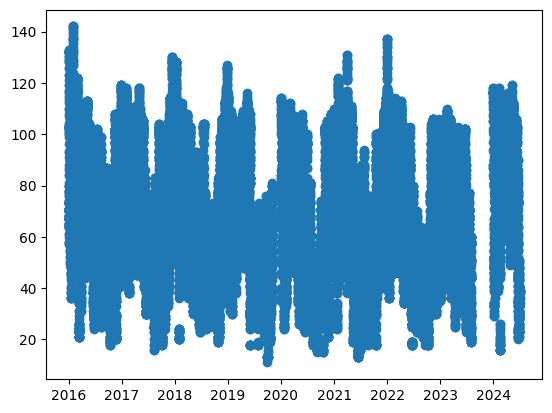

In [174]:
plt.scatter(df.index,df['Noroeste PM10'])

In [175]:
df

,Fecha,Hora,Noroeste PM10,NO-CO,NE-PM10,NE-CO,CE-PM10,CE-CO,SO-MP10,DO-CO,SE-PM10,Sureste monóxido de carbono
Fecha_Hora,,,,,,,,,,,,
2016-01-01 00:00:00,2016/01/01,0,108.0,13.0,117.0,16.0,107.0,16.0,67.0,9.0,107.0,11.0
2016-01-01 01:00:00,2016/01/01,1,110.0,13.0,122.0,18.0,107.0,17.0,70.0,9.0,107.0,12.0
2016-01-01 02:00:00,2016/01/01,2,113.0,14.0,124.0,19.0,109.0,18.0,76.0,10.0,108.0,13.0
2016-01-01 03:00:00,2016/01/01,3,115.0,14.0,126.0,19.0,110.0,19.0,83.0,10.0,107.0,14.0
2016-01-01 04:00:00,2016/01/01,4,116.0,15.0,127.0,20.0,112.0,17.0,90.0,11.0,108.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29 12:00:00,2024/06/29,12,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,26.0,6.0
2024-06-29 13:00:00,2024/06/29,13,39.0,8.0,39.0,7.0,35.0,8.0,23.0,7.0,28.0,6.0
2024-06-29 14:00:00,2024/06/29,14,39.0,7.0,39.0,6.0,35.0,7.0,23.0,6.0,28.0,6.0


In [176]:
#%pip install missingno

Note: you may need to restart the kernel to use updated packages.


### esto sirve para revisar los datos nulos

In [177]:
import missingno as msno

<Axes: >

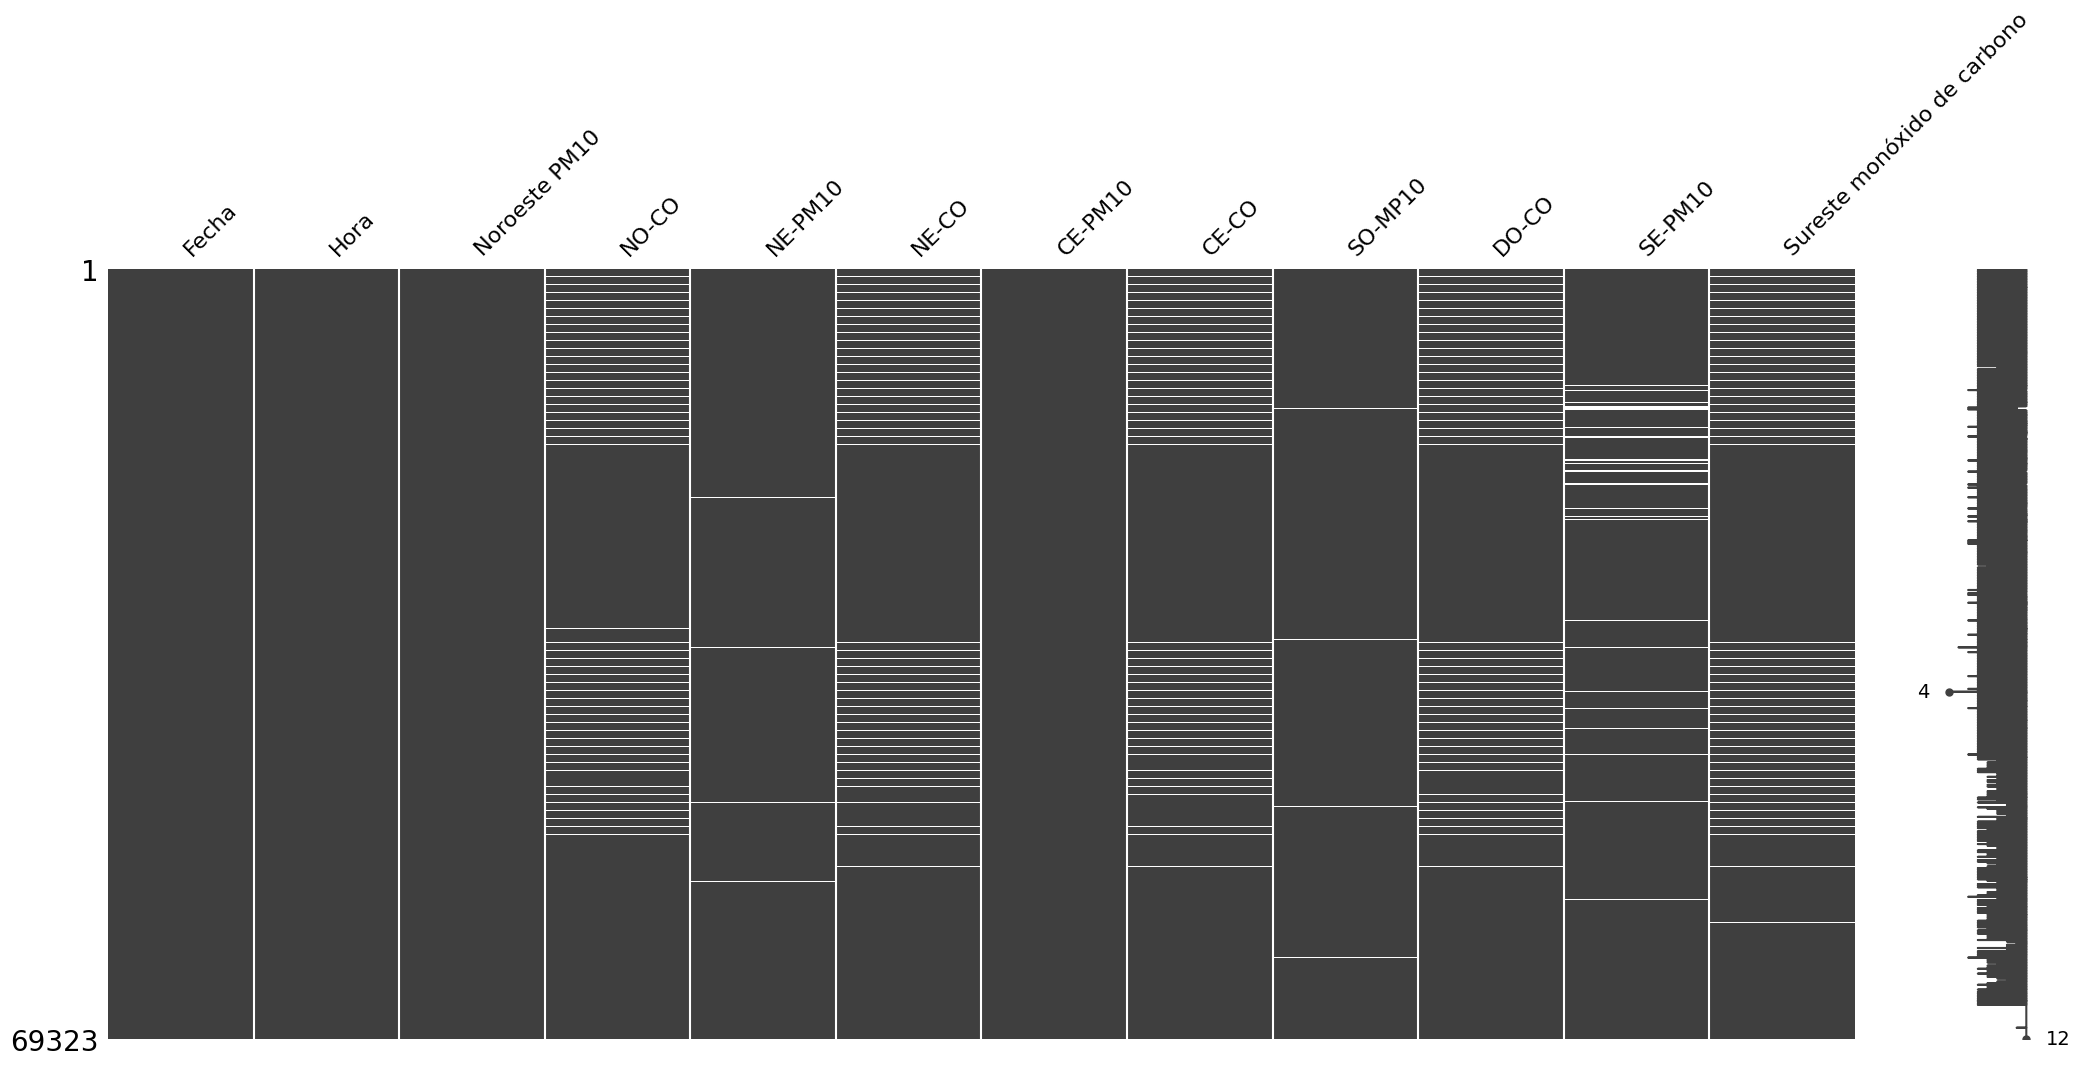

In [178]:
msno.matrix(df)

In [179]:
def plot_time_series(df, variable, zones, ylabel, title, start_date=None, end_date=None):
    plt.figure(figsize=(15, 5))
    if start_date and end_date:
        df = df.loc[start_date:end_date]
    
    for zone in zones:
        column = f"{zone}-{variable}"
        if column in df.columns:
            plt.plot(df.index, df[column], label=column)
        else:
            print(f"Columna {column} no encontrada en el DataFrame")
    plt.xlabel('Fecha_Hora')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

Columna NO-PM10 no encontrada en el DataFrame


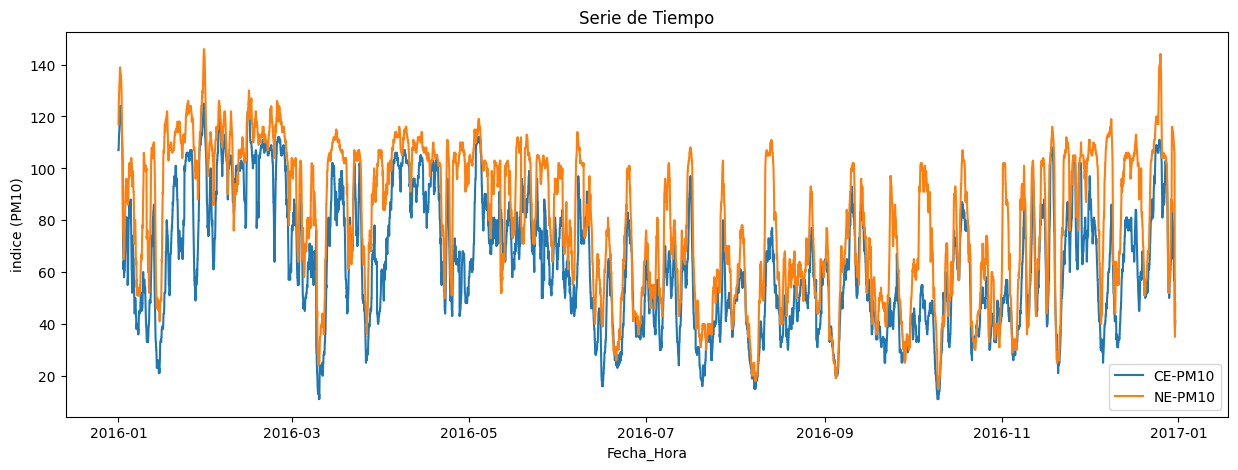

In [182]:
plot_time_series(df,'PM10',['NO','CE','NE'],'indice (PM10)','Serie de Tiempo',start_date='2016-01-01',end_date='2016-12-30' )